In [1]:
from transformers import AutoTokenizer, BertModel

tokenizer = AutoTokenizer.from_pretrained("/opt/data/private/linkdom/model/bert-base-uncased")
model =  BertModel.from_pretrained("/opt/data/private/linkdom/model/bert-base-uncased")

/opt/data/private/linkdom/miniconda3/envs/GPT/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
inputs = tokenizer("I'm stupid, I like you, you are stupid too", return_tensors="pt")
outputs = model(**inputs)

In [19]:
input_ids = inputs['input_ids']

In [20]:
input_ids

tensor([[ 101, 1045, 1005, 1049, 5236, 1010, 1045, 2066, 2017, 1010, 2017, 2024,
         5236, 2205,  102]])

In [21]:
tokenizer.convert_ids_to_tokens(input_ids[0])

['[CLS]',
 'i',
 "'",
 'm',
 'stupid',
 ',',
 'i',
 'like',
 'you',
 ',',
 'you',
 'are',
 'stupid',
 'too',
 '[SEP]']

In [22]:
last_hidden_states = outputs.last_hidden_state

In [23]:
print(last_hidden_states.shape)

torch.Size([1, 15, 768])


In [24]:
embedding = last_hidden_states[0]
embedding.shape

torch.Size([15, 768])

In [29]:
import math
attention = embedding @ embedding.T / math.sqrt(embedding.shape[1])
attention = attention.softmax(dim=-1)

In [30]:
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
tokens

['[CLS]',
 'i',
 "'",
 'm',
 'stupid',
 ',',
 'i',
 'like',
 'you',
 ',',
 'you',
 'are',
 'stupid',
 'too',
 '[SEP]']

In [31]:
tokens_len = len(tokens)

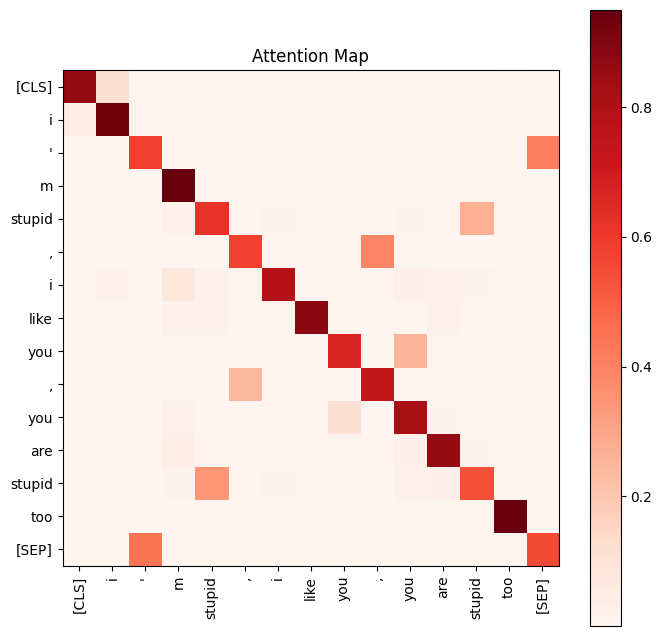

In [33]:
# draw attention matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(attention.detach().numpy(), cmap='Reds')
plt.title('Attention Map')
plt.yticks(range(tokens_len), tokens, rotation=0)
plt.xticks(range(tokens_len), tokens, rotation=90)
plt.colorbar()
plt.show()